
# <p style="text-align: center;">MIS 382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 3</p>
## <p style="text-align: center;">Total points: 60</p>
## <p style="text-align: center;"> Submitted by: Timothy Lai (ttl353), Brett Scroggins (bas4784) </p>
## <p style="text-align: center;">Due: Wednesday, October 25th, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1 - Gradient Descent (5+8+2=15pts)

In this question you will implement vanilla SGD and an adaptive gradient update technique called Adagrad. In addition, you will also implement ridge regularization. 

1. Using stochastic gradient descent, derive the coefficent updates for all 4 coefficients of the model: $$ y = w_0 + w_1*x_1 + w_2*x_1*x_2 + w_3*x_2 $$ Hint: start from the cost function (Assume sum of squared error). If you write the math by hand, submit that as a separate file and make a reference to it in your notebook or include the image in your notebook.
2. Write Python code for an SGD solution to the non-linear model $$ y = w_0 + w_1*x_1 + w_2*x_1*x_2 + w_3*x_2$$ Try to format similarly to scikit-learn's models. Your class should take as input the learning_rate, regularization_constant and number of epochs. The fit method must take as input X,y and a choice of update_rule as 'SGD' or 'adagrad' (Notes on implementation below). The _predict_ method takes an X value (optionally, an array of values). Use your new gradient descent regression to predict the data given in 'samples.csv', for 10 epochs, using learning rates: [.0001, .001, .01, 0.1, 1, 10, 100] and regularization constants in the range: [0,10,100] . Plot MSE and the $w$ parameters as a function of epoch count (10 epochs) for the best 2 combinations of learning_rate and regularization for both SGD and Adagrad. ie you should have 2 plots of MSE and parameter updates for SGD and adagrad each. Report the MSE at the end of 10 epochs for all 4 combinations.
3. Based on the experiments, answer the following:

1. Which of the 2 techniqes allows for larger initial setting of the learning_rate? Why?
2. What would a drawback of adagrad be? How could this be fixed? (Hint: Adadelta)

## ANSWER

#### Part (1) - Weight coefficient derivation for SGD

<img src="HW3_Problem1.jpeg" alt="Drawing" style="width: 500px;"/>

#### Part (2) - SGD Solution to define the class StochasticGradient()

In [1]:
import numpy as np
from sklearn.utils import resample
%matplotlib inline
import pandas as pd
from sklearn.preprocessing import normalize

In [2]:
class StochasticGradient():
    
    def __init__(self, learnrate, reg_constant, epoch):
        self.learnrate = learnrate
        self.reg_constant = reg_constant
        self.epoch = epoch
        
    def fit(self, X, y):
        
        weights = np.array([0.005,0.005,0.005,0.005])
        
        w0 = weights[0]
        w1 = weights[1]
        w2 = weights[2]
        w3 = weights[3]
        X = normalize(X)
        
        train, pred = resample(X, y, random_state = 0, replace = False)
                
        for a in range(self.epoch):
            for b in range(self.reg_constant):
                x1 = train[b][0]
                x2 = train[b][1]
                n = self.learnrate
                t = pred[b]
                y = w0 + w1*x1 + w2*x1*x2 + w3*x2
                
                w0 = w0 + 2*(t-y)*n + 2*b*w0
                w1 = w1 + 2*x1*(t-y)*n + 2*b*w1
                w2 = w2 + 2*x1*x2*(t-y)*n + 2*b*w2
                w3 = w3 + 2*x2*(t-y)*n + 2*b*w3
                
                nweights = [w0, w1, w2, w3]
            
            train, pred = resample(train, pred, random_state = 0, replace = False)
                                               
        self.weights = weights
    
    def predict(self, X, weights = None):
        
        predicts = []
        
        if weights == None:
            w0 = self.weights[0]
            w1 = self.weights[1]
            w2 = self.weights[2]
            w3 = self.weights[3]
            
        else:
            w0 = weights[0]
            w1 = weights[1]
            w2 = weights[2]
            w3 = weights[3]
            
        n = self.learnrate
        
        for p in X:
            x1 = p[0]
            x2 = p[1]
            
            y_pred = w0 + w1*x1 + w2*x1*x2 + w3*x2
            
            predicts.append(y_pred)
            
        self.predicts = predicts

In [3]:
samples = pd.read_csv('samples.csv', names=['index', 'x1', 'x2', 'target'], header = 0)
features = samples[['x1', 'x2']]
target = samples['target']

X, y = np.array(features), np.array(target)

In [4]:
from sklearn.metrics import mean_squared_error

learnrate = [.0001, .001, .01, 0.1, 1, 10, 100]
reg_constant = [0,10,100]

sg1 = StochasticGradient(learnrate = .0001, reg_constant = 0, epoch = 10)
sg1.fit(X,y)
sg1.predict(X)

for i in learnrate:
    for j in reg_constant:
        sg = StochasticGradient(learnrate = i, reg_constant = j, epoch = 10)
        sg.fit(X,y)
        sg.predict(X)
        
        mse = round((mean_squared_error(sg1.predicts,y)),3)
        
        print 'Learning Rate = ' + str(i) + ', Regularization Constant = ' + str (j) + ', and MSE = ' + str(mse)

Learning Rate = 0.0001, Regularization Constant = 0, and MSE = 13.995
Learning Rate = 0.0001, Regularization Constant = 10, and MSE = 13.995
Learning Rate = 0.0001, Regularization Constant = 100, and MSE = 13.995
Learning Rate = 0.001, Regularization Constant = 0, and MSE = 13.995
Learning Rate = 0.001, Regularization Constant = 10, and MSE = 13.995
Learning Rate = 0.001, Regularization Constant = 100, and MSE = 13.995
Learning Rate = 0.01, Regularization Constant = 0, and MSE = 13.995
Learning Rate = 0.01, Regularization Constant = 10, and MSE = 13.995
Learning Rate = 0.01, Regularization Constant = 100, and MSE = 13.995
Learning Rate = 0.1, Regularization Constant = 0, and MSE = 13.995
Learning Rate = 0.1, Regularization Constant = 10, and MSE = 13.995
Learning Rate = 0.1, Regularization Constant = 100, and MSE = 13.995
Learning Rate = 1, Regularization Constant = 0, and MSE = 13.995
Learning Rate = 1, Regularization Constant = 10, and MSE = 13.995
Learning Rate = 1, Regularization C

/Users/timothylai/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in double_scalars
/Users/timothylai/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in double_scalars
/Users/timothylai/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in double_scalars
/Users/timothylai/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in double_scalars
/Users/timothylai/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars
/Users/timothylai/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars
/Users/timothylai/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars
/Users/timothylai/anaconda/lib/py

- We know that we are searching for the optimal combination of Learning Rate and Regularization Constant but since all MSE's are the same, we are assuming that we have a slight miscalculation or error in our code.

- NOTE: Quantitatively, we are unsure with how to proceed when finding the optimal learning rate and regularization constant combination for our SGD solution. Our MSE is the same throughout, and thus cannot gather accurate insights in regards to whether our SGD is operating effectively. A plot at this point would yield a constant, and would not provide insight.

#### Part (3):

1. Based on qualitative research and reasoning, Adagrad should theoretically allow for a larger initial setting of the learning rate. The pitfall of using SGD is that in certain situations, momentum may be very high and does not know to slow down - thus we do not accurately achieve the desired minima. AdaGrad, on the other hand, allows the learning rate to adapt, essentially eliminating a need to tune the learning rate. With this in mind, the initial setting is insignificant since AdaGrad should theoretically tune to the optimal parameters.  

2. The drawback of Adagrad is that the learning rate converges to zero as time increases. To resolve this issue, AdaDelta implements a combination of two methodologies. First, AdaDelta scales the learning rate only on recent time, unlike AdaGrad. Secondly, AdaDelta considers a component that essentially considers all historical information, similar to momentum.

# Notes on Adagrad
Adagrad (http://ruder.io/optimizing-gradient-descent/) differs from vanilla SGD in that the learning rate of each weight changes over updates. A cache is maintained that holds the sum of squares of all gradients upto the current update. The learning_rate is divided by the cache, resulting in a different learning rate for each weight. A consequence of this update rule is that weights that have already seen large gradients (made large jumps) make smaller updates in subsequent iterations.
Specifically, the steps can be listed as below:
1. cache = cache + (gradients^2)
2. weights = weights + ((learning_rate)/sqrt(cache+1e-6))*gradients

# (Optional) Notes on Training with Gradient Descent
1. Compute error: This consists of a prediction error and a regularization term. From an implementation perspective, this is a function that takes as input the truth, prediction and regularization hyperparameter and returns an error
2. Compute gradients: Take a derivative of the error in terms of the weights. This can be modelled as a function that takes as input the error and features and returns the gradients for each weight
3. Update weights: Weight updates can be done using vanilla SGD or adaptive techniques. The update function takes as inputs the gradient and hyperparameters and returns the new weights.

# 2. (6+4=10 pts) Tensor Playground
Visit http://playground.tensorflow.org for this problem

A. From the far right, select "Regression" as the problem type, and select the 2nd of the two data sets ( the right one ).  

   i) What sort of test / training loss do you get if you run it for 200 epochs with the following learning rates: .3, .01 and .003 ?  What if you run it for 1000 epochs with these learning rates?  Leave all other values at their defaults ( test/training ratio 50%, Noise 0, Batch Size 10, using Tanh activation function, and No Regularization )
   
   ii) Keeping learning rate at .3, Activation at Tanh, with all others at their defaults, and running for 200 epochs.  
     What sort of test/train loss can you achieve using only 1 neuron in the first hidden layer.  What about for 2,3 or 8 neurons?  Provide screen shots of output layer and comment on how the different output fits look and compare with one another.

   iii)Now keeping learning rate at .03 with all others at their defaults, and running for 200 epochs.  
       Compare how the activation functions affect the ouput ( ReLU, Sigmoid, Tanh, Linear ). Provide screen shots of output results and comment.


B. Neural Nets can fit anything.  Now reset to the initial defaults, and select "Classification" as the problem type, and from the Data section, select the bottom right "Spriral" data set.  With the idea of trying to minimize training/testing error, provide solutions to the problem for the following 2 scenarios.  i) Using just the first 2 inputs ( as per default ) and ii) Using all 7 of the inputs.  You may use as many layers as you want, whatever activation, however man neurons.  Provide screen shots which show your full network, output and parameters. Briefly justify your decisions, and comment on difficulties/tradeoffs, what helps/what doesn't,etc. 

### ANSWER

#### Part A

#### i) The following results were obtained for test/training loss when we run Tensor Flow with 200 epochs with other values set at default:

For a learning rate of 0.3: Test Loss = 0.014 and Training Loss = 0.013
<br>
For a learning rate of 0.01: Test Loss = 0.032 and Training Loss = 0.029
<br>
For a learning rate of 0.003: Test Loss = 0.029 and Training Loss = 0.028
<br>

Also running at the same learning rates for 1000 epochs, we get the following results:

For a learning rate of 0.3: Test Loss = 0.020 and Training Loss = 0.018
<br>
For a learning rate of 0.01: Test Loss = 0.017 and Training Loss = 0.016
<br>
For a learning rate of 0.003: Test Loss = 0.020 and Training Loss = 0.019
<br>

#### ii) Now keeping learning rate at 0.3 and running with 200 epochs and other default values, checking output for various numbers of neurons in the first hidden layer.

First, for 1 neuron in the first layer: 
</n>

<img src="Question2_Partii_1neuron.png" alt="Drawing" style="width: 250px;"/>

</n>

For 2 neurons in the first layer:
</n>

<img src="Question2_Partii_2neurons.png" alt="Drawing" style="width: 250px;"/>

</n>

For 3 neurons in the first layer:
</n>

<img src="Question2_Partii_3neurons.png" alt="Drawing" style="width: 250px;"/>

</n>

For 8 neurons in the first layer:
</n>

<img src="Question2_Partii_8neurons.png" alt="Drawing" style="width: 250px;"/>

<br>
In comparing the four screenshots and scenarios, we are able to see that the losses returned by the TensorFlow runs become smaller as we add more neurons to the first hidden layer. 8 neurons returns a 0.012 test loss vs. 1 neuron returning 0.046 test loss under similar conditions. This was also the case for the training loss.  
<br>
It is also noticeable that we see convergence more quickly as well with a larger number of neurons. The run with 3 neurons was much more unstable originally when looking at the losses coverge. With lesser number of neurons, we see an immediate steep drop but a slower rate of convergence when compared to runs with more neurons in the first hidden layer.
<br>

The 1 and 2 neuron selections did not resemble the shape of the original selection well, whereas the shapes were more well defined as we increased the number of neurons. In general, with a higher number of neurons, we would likely see a more accurate regression.

#### iii) Now keeping learning rate at 0.03 and running with 200 epochs and other default values, checking output for various activation functions.

First, for the activation function ReLU: 
</n>

<img src="Question2_Partiii_ReLU.png" alt="Drawing" style="width: 250px;"/>

</n>

For the activation function Sigmoid:
</n>

<img src="Question2_Partiii_Sigmoid.png" alt="Drawing" style="width: 250px;"/>

</n>

For the activation function Tanh:
</n>

<img src="Question2_Partiii_Tanh.png" alt="Drawing" style="width: 250px;"/>

</n>

For the activation function Linear:
</n>

<img src="Question2_Partiii_Linear.png" alt="Drawing" style="width: 250px;"/>
<br>
In comparing these four screenshots and scenarios, we are able to see that Tanh returns the lowest test and train losses, followed by ReLU, Sigmoid, and Linear. Some items to note were that ReLU also showed a strong accuracy in the separating the blues and oranges. Sigmoid had a quick drop when running the epochs that resulted in a sharp decline in losses and clearly defined clusters of blues and oranges. Tanh had a steady decline in losses throughout the number of epochs. Linear resulted in a quick drop in losses and then no change through most of the latter epochs.
<br>

Based on parts ii) and iii) to Part A, we can deduce that a higher number of neurons and a choice of tanh as the choice of activation function could potentially minimize our test and train losses.

### Part B

Minimizing the test loss and train loss under various scenarios where the tuning parameters are changed, we see the following results:
<br>
First, for 2 inputs and varied parameters:
<br>

<img src="Question2_PartB_2inputs.png" alt="Drawing" style="width: 2000px;"/>

<br>

Then, for 7 inputs and varied parameters:
<br>

<img src="Question2_PartB_7inputs.png" alt="Drawing" style="width: 2000px;"/>
<br>

In both cases presented above, we chose to use the maximum number of neurons for each layer. In Sub-Part ii) of the earlier Part A, we were able to see that a higher number of neurons resulted in a lower test and training loss. Furthermore, the ReLU activation function seemed to be more accurate in classifying blues and oranges. Additional parameters were not modified, such as learning rate, set to the standard value of 0.03 for computational time benefits. With no noise, there would not be a huge perceived benefit in adding many additional hidden layers, so 3 and 2 hidden layers were chosen, respectively.
<br>
Numerically, we see that using 7 inputs produces a lower test and train loss as compared to 2 inputs. With the additional inputs, we would expect a higher classification accuracy. It is notable that both test losses are around 0.03 and training losses around 0.004 - therefore we can see that the model is slightly overfitted. However, the losses have still been fairly minimized without overthinking the problem, and by using the concepts described earlier, these were the optimal results given what we know about each individual tuning parameter.

# Question 3: Multi-layer Perceptron Regressor (15 points)

In this question, you will explore the application of Multi-layer Perceptron (MLP) regression using sklearn package in Python. We will use the Appliances energy prediction dataset for this problem https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction.

Following code will pre-process the data and split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 42** and **test_size = 0.33**.
Make sure you have 56 variables and one target variable.

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import glob
%matplotlib inline

from sklearn import datasets

data = pd.read_csv('./energydata_complete.csv') 

y = data['Appliances']
X = data.drop(['date','Appliances', 'rv1', 'rv2'], axis = 1)


from dateutil import parser
timeData = np.array(data['date'])

days = []
hours = []
for line in xrange(len(timeData)):
    day = parser.parse(timeData[line]).weekday()
    hour = parser.parse(timeData[line]).hour
    days.append(day)
    hours.append(hour)
    
X = pd.concat([X, pd.get_dummies(days), pd.get_dummies(hours)], axis = 1)


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((13222, 56), (13222,), (6513, 56), (6513,))


One more thing to use in this problem is [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on original data, use StandardScaler to make each feature centered ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Whenever you have training and test data, fit a scaler on training data and use this scaler on test data. Here, scale only features (independent variables), not target variable y.

Use [sklearn.neural_nework.MLPRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) to do a 5-fold cross validation using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold). The cross validation must be performed on the **training data**. 

1) Use following parameter settings for MLPRegressor:

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
    batch_size=5000, learning_rate_init = 0.005
    
Now, consider three different settings for the number of hidden units:
    
   (a) *hidden_layer_sizes = (2,)* (b) *hidden_layer_sizes = (30,10)* (c) *hidden_layer_sizes = (100,)*
    
   Report the average Root Mean Squared Error (RMSE) value based on your 5-fold cross validation for each model: (a), (b), and (c) (5pts)
      
2) Now, using the same number of hidden units used in part 1), train MLPRegressor models on whole training data and report RMSE score for both Train and Test set (Again, use StandardScaler). Which model works the best, (a), (b), or (c)? Briefly analyze the result in terms of the number of hidden units. (3pts)

3) MLPRegressor has a built-in attribute *loss\_curve\_* which returns the loss at each epoch (misleadingly referred to as "iteration" in scikit documentation, though they use epoch in the actual code!). For example, if your model is named as *my_model* you can call it as *my\_model.loss\_curve\_* ([example](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py)). Plot three curves for model (a), (b), and (c) in one figure, where *X-axis* is epoch  number and *Y-axis* is squared root of *loss\_curve\_* value. (2pts)

4) Use following parameter settings for MLPRegressor:

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
    batch_size=5000, hidden_layer_sizes = (15,)
    
Now, consider three different settings for the learning rates:
    
   (i) *learning_rate_init = 0.005* (ii) *learning_rate_init = 0.01* (iii) *learning_rate_init = 1*
    
   Report the average Root Mean Squared Error (RMSE) value based on your 5-fold cross validation for each model: (i), (ii), and (iii) (5pts)




## ANSWER

In [6]:
# First scaling and centering features for X's (independent variables)

X_scaler = StandardScaler()

X_train = X_scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)

X_test = X_scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test)

### 1) Using 5-Fold Cross Validation for models (a), (b), and (c) and reporting RMSE, where:
#### (a) hidden_layer_sizes = (2,)
#### (b) hidden_layer_sizes = (30,10)
#### (c) hidden_layer_sizes = (100,)

In [7]:
# Define each model

# Model(a)
mlp2 = MLPRegressor(hidden_layer_sizes=(2,), activation = 'tanh', solver = 'sgd', learning_rate='constant', 
                    random_state=42, batch_size=5000, learning_rate_init = 0.005)

# Model(b)
mlp30 = MLPRegressor(hidden_layer_sizes=(30,10), activation = 'tanh', solver = 'sgd', learning_rate='constant', 
                    random_state=42, batch_size=5000, learning_rate_init = 0.005)

# Model(c)
mlp100 = MLPRegressor(hidden_layer_sizes=(100,), activation = 'tanh', solver = 'sgd', learning_rate='constant', 
                    random_state=42, batch_size=5000, learning_rate_init = 0.005)

In [8]:
# Now performing 5-Fold Cross Validation
kf = KFold(n_splits=5, random_state=42)
kf.get_n_splits(X_train)

for train, test in kf.split(X_train):
    # Fitting all models to MLPRegressor
    mlp2.fit(X_train.iloc[train], y_train.iloc[train])
    mlp30.fit(X_train.iloc[train], y_train.iloc[train])
    mlp100.fit(X_train.iloc[train], y_train.iloc[train])
    
    # Setting up predictions with each model
    mlp2_y_train_predict = mlp2.predict(X_train.iloc[test])
    mlp30_y_train_predict = mlp30.predict(X_train.iloc[test])
    mlp100_y_train_predict = mlp100.predict(X_train.iloc[test])

    # True value
    y_pred = y_train.iloc[test]

    rmse2 = (mean_squared_error(y_pred,mlp2_y_train_predict))**0.5
    rmse30 = (mean_squared_error(y_pred,mlp30_y_train_predict))**0.5
    rmse100 = (mean_squared_error(y_pred,mlp100_y_train_predict))**0.5


print "Average Root Mean Squared Error (RMSE) for 5-fold cross validation models are as follows: \n"
print "For 2 hidden layers, RMSE = %.2f" % (np.mean(rmse2))
print "For 30,10 hidden layers, RMSE = %.2f" % (np.mean(rmse30))
print "For 100 hidden layers, RMSE = %.2f" % (np.mean(rmse100))

Average Root Mean Squared Error (RMSE) for 5-fold cross validation models are as follows: 

For 2 hidden layers, RMSE = 96.74
For 30,10 hidden layers, RMSE = 102.84
For 100 hidden layers, RMSE = 82.55


### 2) Now training on whole training data and reporting RMSE for training and test sets:

In [9]:
# Fitting on both X's and Y's
mlp2whole = mlp2.fit(X_train, y_train)
mlp30whole = mlp30.fit(X_train, y_train)
mlp100whole = mlp100.fit(X_train, y_train)

# Predictions
mlp2whole_train_pred = mlp2.predict(X_train)
mlp2whole_pred = mlp2.predict(X_test)

mlp30whole_train_pred = mlp30.predict(X_train)
mlp30whole_pred = mlp30.predict(X_test)

mlp100whole_train_pred = mlp100.predict(X_train)
mlp100whole_pred = mlp100.predict(X_test)

# RMSE's
mlp2_is_rmse = (mean_squared_error(y_train,mlp2whole_train_pred))**0.5
mlp2_oos_rmse = (mean_squared_error(y_test, mlp2whole_pred))**0.5

mlp30_is_rmse = (mean_squared_error(y_train,mlp30whole_train_pred))**0.5
mlp30_oos_rmse = (mean_squared_error(y_test, mlp30whole_pred))**0.5

mlp100_is_rmse = (mean_squared_error(y_train,mlp100whole_train_pred))**0.5
mlp100_oos_rmse = (mean_squared_error(y_test, mlp100whole_pred))**0.5

# Print outputs
print "Root mean squared error (RMSE) values after training on the whole data are as follows: \n"
print "For 2 hidden layers, In Sample RMSE = %.2f" % mlp2_is_rmse
print "For 2 hidden layers, Out of Sample RMSE = %.2f" % mlp2_oos_rmse
print "\n"

print "For 30,10 hidden layers, In Sample RMSE = %.2f" % mlp30_is_rmse
print "For 30,10 hidden layers, Out of Sample RMSE = %.2f" % mlp30_oos_rmse
print "\n"

print "For 100 hidden layers, In Sample RMSE = %.2f" % mlp100_is_rmse
print "For 100 hidden layers, Out of Sample RMSE = %.2f" % mlp100_oos_rmse

Root mean squared error (RMSE) values after training on the whole data are as follows: 

For 2 hidden layers, In Sample RMSE = 92.44
For 2 hidden layers, Out of Sample RMSE = 93.21


For 30,10 hidden layers, In Sample RMSE = 78.65
For 30,10 hidden layers, Out of Sample RMSE = 85.63


For 100 hidden layers, In Sample RMSE = 67.78
For 100 hidden layers, Out of Sample RMSE = 80.81


As seen above in Part (a), the higher number of models with a higher number of hidden layers produce the smaller RMSE values. The model with 100 hidden layers, in both cases, showed a better predictive accuracy (both in and out of sample). This is because the introduction of hidden layers allows for the model to be further trainined on data, especially beneficial if the data is complex. However, it is worth noting that our in sample RMSE's are consistently lower than the out of sample RMSE's, and therefore there is no evidence of overfitting.

### 3) Now plotting curves for each of the three models:

Populating the interactive namespace from numpy and matplotlib


/Users/timothylai/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


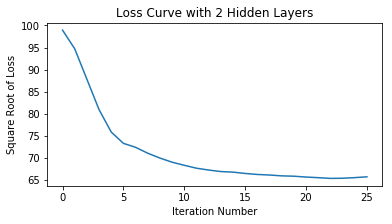

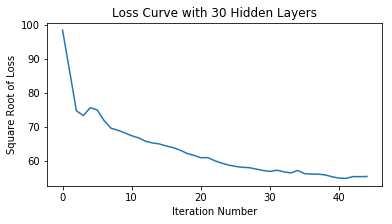

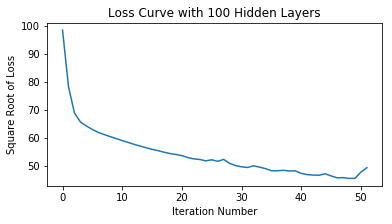

In [10]:
%pylab inline

figure(figsize(6,3))
plot(np.sqrt(mlp2.loss_curve_))
title('Loss Curve with 2 Hidden Layers')
xlabel('Iteration Number')
ylabel('Square Root of Loss')
plt.show()

figure(figsize(6,3))
plot(np.sqrt(mlp30.loss_curve_))
title('Loss Curve with 30 Hidden Layers')
xlabel('Iteration Number')
ylabel('Square Root of Loss')
plt.show()

figure(figsize(6,3))
plot(np.sqrt(mlp100.loss_curve_))
title('Loss Curve with 100 Hidden Layers')
xlabel('Iteration Number')
ylabel('Square Root of Loss')
plt.show()

### 4) Using 5-Fold Cross Validation for models (a), (b), and (c) and reporting RMSE, where:
#### (i) learning_rate_init = 0.005
#### (ii) learning_rate_init = 0.01
#### (iii) learning_rate_init = 1

In [11]:
# Define each model

# Model(i)
mlp005 = MLPRegressor(activation = 'tanh', solver = 'sgd', learning_rate='constant', 
                    random_state=42, batch_size=5000, hidden_layer_sizes = (15,), learning_rate_init = 0.005)

# Model(ii)
mlp01 = MLPRegressor(activation = 'tanh', solver = 'sgd', learning_rate='constant', 
                    random_state=42, batch_size=5000, hidden_layer_sizes = (15,), learning_rate_init = 0.01)

# Model(iii)
mlp1 = MLPRegressor(activation = 'tanh', solver = 'sgd', learning_rate='constant', 
                    random_state=42, batch_size=5000, hidden_layer_sizes = (15,), learning_rate_init = 1)

In [12]:
# Now performing 5-Fold Cross Validation
kf = KFold(n_splits=5, random_state=42)
kf.get_n_splits(X_train)

for train, test in kf.split(X_train):
    # Fitting all models to MLPRegressor
    mlp005.fit(X_train.iloc[train], y_train.iloc[train])
    mlp01.fit(X_train.iloc[train], y_train.iloc[train])
    mlp1.fit(X_train.iloc[train], y_train.iloc[train])
    
    # Setting up predictions with each model
    mlp005_y_train_predict = mlp005.predict(X_train.iloc[test])
    mlp01_y_train_predict = mlp01.predict(X_train.iloc[test])
    mlp1_y_train_predict = mlp1.predict(X_train.iloc[test])

    # True value
    y_pred = y_train.iloc[test]

    rmse005 = (mean_squared_error(y_pred,mlp005_y_train_predict))**0.5
    rmse01 = (mean_squared_error(y_pred,mlp01_y_train_predict))**0.5
    rmse1 = (mean_squared_error(y_pred,mlp1_y_train_predict))**0.5
    
print "Average Root Mean Squared Error (RMSE) for 5-fold cross validation models are as follows: \n"
print "For Learning Rate = 0.005, RMSE = %.2f" % (np.mean(rmse005))
print "For Learning Rate = 0.01, RMSE = %.2f" % (np.mean(rmse01))
print "For Learning Rate = 1, RMSE = %.2f" % (np.mean(rmse1))

Average Root Mean Squared Error (RMSE) for 5-fold cross validation models are as follows: 

For Learning Rate = 0.005, RMSE = 88.93
For Learning Rate = 0.01, RMSE = 90.25
For Learning Rate = 1, RMSE = 45570023377.06


Here, we see that with the models tuned for various learning rates, the lowest RMSE is returned with the lowest learning rate of 0.005. It is also interesting to note that the RMSE shoots up when we set learning rate = 1. With a higher learning rate, we are less likely to converge - the RMSE in this case likely moved outside of any bounds (ie: minima) to return this extremely high result.

# Question 4: (2+5+3=10 pts) Bayes Decision Theory
a. Explain what you understand by class-conditional likelihood, class priors, and posterior probability of a class given an input, and the relationship between them. Please define all symbols and equations used explicitly.
( 2 points )

b. Suppose you want to learn a binary classifier to predict whether or not a customer will buy a TV. The class label is 0 if the customer does not buy a TV and 1 if they do. For each customer, you are given two features, $x_1$ is the per hour salary and $x_2$ is the age. Assume that the class conditional distribution $p([x_1 , x_2]|C)$ is Gaussian. The mean salary and age of the people who do buy a TV is 15 and 30 respectively and that of those who don’t is 8.5 and 25. Assume that both classes of customers have the same covariance given by the Identity matrix. Further, your sales data suggests that only 1 in 3 people actually bought a TV in the last few years. Mathematically derive the (optimal) Bayes decision boundary for this problem. (5 points)

c. Now write code to sample 100 customers from each class (C = 0, 1) under the assumed distribution and the estimated parameters and plot their features. Additionally, plot the decision boundary you obtained in the part (b) on the same plot. (3 points)

## ANSWER

#### (a) Some understandings about Bayes Decision Theory:

- The class-conditional likelihood represents the probability that you will get a result given a fact. In other words, it will tell us the probability that we will get certain results given certain knows. Numerically, we can write this out as:

$$ P(x|w) = \dfrac{P(X \cap W)}{P(W)} $$

where W represents the known information.

- Class priors reflect the probability that the next result is going to match your prediction based on the past. Also, we don't know anything about the new data at this point. For example, if we know probabilities from the past that are from previous experience, these would represent the class priors. Numerically, we can write this out as:

$$ \Sigma_{i=1}^{c}P(w_{i}) = 1 $$

where w represents the classes.

- Posterior probability reflects the probability of the state of nature given that the feature `x` has been measured. The posterior probability can be represented by the following formula:

$$ P(\omega, x) = P(\omega|x)p(x) = p(x|\omega)P(\omega) $$


$$ P(\omega|x) = \dfrac{p(x | \omega)\pi_{j}}{p(x)} $$

where we can see that observing the value of x, we can convert the prior probability $ \pi_{j} $ to the a posteriori probability (posterior) $ p(x | \omega) $.

#### (b) Mathematical derivation of Optimal Bayes Decision Boundary under given conditions

<img src="HW3_Problem4b.jpeg" alt="Drawing" style="width: 500px;"/>

#### (c) Sampling 100 customers and plotting the optimal Bayes Decision Boundary

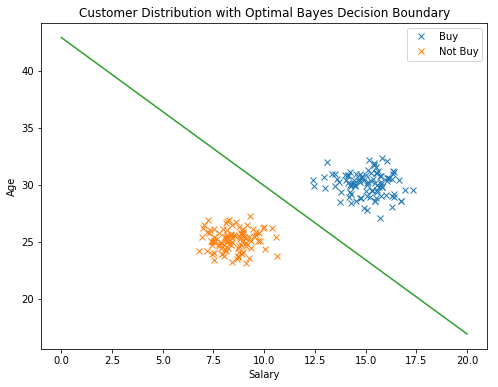

In [13]:
figure(figsize(8,6))

# Setting up the mean statistics and covariance for buy
mean_buy = [15,30]
cov_buy = [[1,0], [0,1]]

# Generating a random 100 samples to represent customers
xbuy, ybuy = np.random.multivariate_normal(mean_buy, cov_buy, 100).T
plt.plot(xbuy, ybuy, 'x')

# Setting up the mean statistics and covariance for no buy
not_buy = [8.5, 25]
cov_notbuy = [[1,0], [0,1]]

# Generating a random 100 samples to represent customers
xnotbuy, ynotbuy = np.random.multivariate_normal(not_buy, cov_buy, 100).T
plt.plot(xnotbuy, ynotbuy, 'x')

# Now plotting the optimal Bayes Decision boundary from (b)
plt.plot([0,20],[42.91,16.91])
plt.legend(['Buy', 'Not Buy'], loc='best')
plt.title('Customer Distribution with Optimal Bayes Decision Boundary')
plt.xlabel('Salary')
plt.ylabel('Age')
plt.show()

# Question 5: Decision Tree using Python (10 pts)
In this problem, you will model the data using decision trees to perform a classification task. Load the BreastTissue.csv dataset. The dataset has been preprocessed. The description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Breast+Tissue). Using the class tree.DecisionTreeClassifier (http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree), build two different trees with a maximum depth of two using the split criteria (i) Gini and (ii) Entropy. Use all the data to build trees. Plot the two trees. If your classifier object is called clf, use the following commands to save the generated tree as a '.dot' file that can be used to visualize the tree using Webgraphviz: http://www.webgraphviz.com/

Hint: see  http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

Copy paste the contents of your '.dot' file into the text window on the website to visualize the trees. At which node(s) do they differ?

In [14]:
from sklearn import tree
from sklearn.externals.six import StringIO
data = pd.read_csv('BreastTissue.csv')
y = data['Class']
X = data.iloc[:,2:]

#### Gini results, with max depth = 2

In [15]:
model1 = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 2)
model1.fit(X,y)
with open('decision_tree_gini.dot','w') as f:
    f = tree.export_graphviz(model1,out_file = f, class_names = ['aid','car','mas','gls','fed','con'])

<img src="Gini Graph.png" alt="Drawing" style="width: 500px;"/>

#### Entropy results, with max depth = 2

In [16]:
model2 = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)
model2.fit(X,y)
with open('decision_tree_entropy.dot','w') as f:
    f = tree.export_graphviz(model2,out_file = f, class_names = ['aid','car','mas','gls','fed','con'])

<img src="Entropy Graph.png" alt="Drawing" style="width: 800px;"/>

#### Comments:

From the above plotted trees, we see that the differences between the two plots occur at the second split. On the Gini plot, we see that the second split on the "True" branch yields `class = mas`, while it no longer appears in the Entropy plot and is replaced by `class = con`. On the "False" branch, we see that `class = mas` is now present for the Entropy plot as well as `class = aid`.